Task 1

In [1]:
%pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
from pathlib import Path

In [47]:
filepath=Path("./Datasets/machine_temp_failure_missing.csv")
df=pd.read_csv(filepath)
df
# The dataset has been read

,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [48]:
df.info()
# The no. of values in both columns are not equal, indicating the presence of missing values

# 1285 missing values in specific which can be obtained by the following
df['value'].isnull().sum()

# Let us find out the rows containing missing values
df[df['value'].isnull()]
# In all of the rows, we have NaN

# Now we find all the statistics about the dataset
mean=df['value'].mean()
median=df['value'].median()
mode=df['value'].mode()

# We now change the name of the 'value' column to 'temperature'
df.rename(columns={'value':'temperature'},inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


Task 2

In [49]:
df['delta_temperature_1']=df['temperature'].diff()
# current - previous

df['delta_temperature_2']=df['temperature'].shift(-1)-df['temperature']
# next - current
df


,timestamp,temperature,delta_temperature_1,delta_temperature_2
0,02-12-2013 21:15,73.967322,NaN,0.968560
1,02-12-2013 21:20,74.935882,0.968560,1.188280
2,02-12-2013 21:25,76.124162,1.188280,2.016546
3,02-12-2013 21:30,78.140707,2.016546,1.189128
4,02-12-2013 21:35,79.329836,1.189128,-0.619417
...,...,...,...,...
22690,19-02-2014 15:05,98.185415,NaN,-0.381246
22691,19-02-2014 15:10,97.804168,-0.381246,-0.668700
22692,19-02-2014 15:15,97.135468,-0.668700,0.921384
22693,19-02-2014 15:20,98.056852,0.921384,-1.152991


Task 3

In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'temperature')

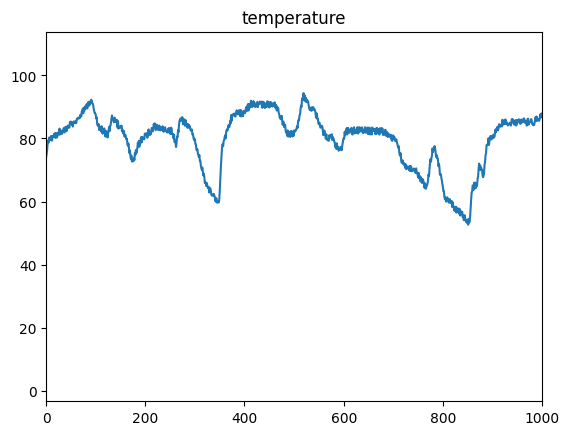

In [51]:
df['temperature'].plot()
plt.xlim(0,1000)
plt.title('temperature')

Text(0.5, 1.0, 'delta_temperature_2')

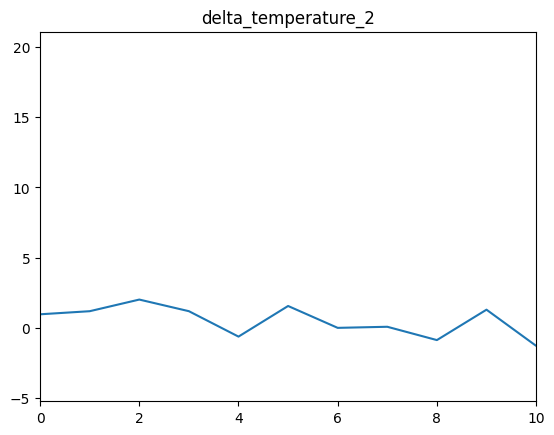

In [52]:
df['delta_temperature_2'].plot()
plt.xlim(0,10)
plt.title('delta_temperature_2')

Task 4

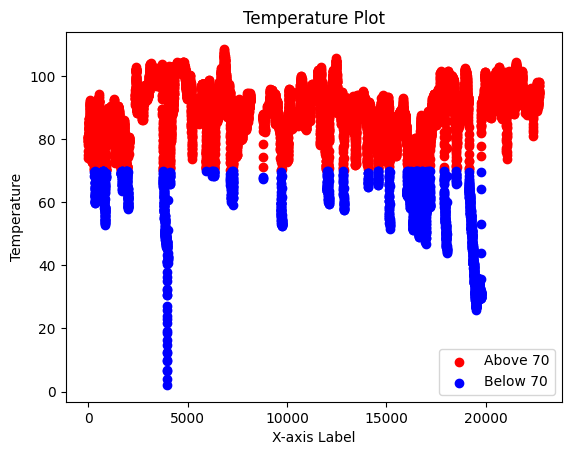

In [53]:
above_threshold = df['temperature']>70
below_threshold = df['temperature']<=70

plt.scatter(df.index[above_threshold],df['temperature'][above_threshold],color='red',label='Above 70')
plt.scatter(df.index[below_threshold],df['temperature'][below_threshold],color='blue',label='Below 70')

plt.title('Temperature Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Temperature')
plt.legend()

plt.show()

Task 5

In [69]:
import numpy as np
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [55]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'value'})
    
    columns = df_missing.loc[:, 'value':].columns.tolist()
    print(columns)
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [43]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df


Task 6

In [63]:
folder=Path('./Datasets/')
dfa=read_dataset(folder,'machine_temp_failure_original.csv','timestamp')
dfb=read_dataset(folder,'machine_temp_failure_missing.csv','timestamp')
dfa

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836
...,...
2014-02-19 15:05:00,98.185415
2014-02-19 15:10:00,97.804168
2014-02-19 15:15:00,97.135468


In [70]:
dfb['ffill']=dfb['value'].fillna(method='ffill')
dfb['bfill']=dfb['value'].fillna(method='bfill')
dfb['mean']=dfb['value'].fillna(dfb['value'].mean())

In [71]:
_ = rmse_score(dfa,dfb,'value')

RMSE for ffill: nan
RMSE for bfill: nan
RMSE for mean: nan
